In [25]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [26]:
# with help from http://planspace.org/20150423-forward_selection_with_statsmodels/
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < (best_new_score * 1):
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    
    model = smf.ols(formula, data).fit()
    return (model, formula)

In [27]:
# make df to map from zipcode to state - in case we want to filter anything by state
# state_zip_map.to_pickle('data/state_zip_map.pkl')
state_zip_map = pd.read_pickle('data/state_zip_map.pkl')

### - house/rental ratio 2015 (below)

In [35]:
# read in the HOUSE/RENT ratio for 2015 - this is our response variable
ratio_response = pd.read_pickle('data/housing_rental_ratio.pkl')
ratio_response = ratio_response.rename(columns = {'RegionName': 'zipcode'})

ratio_2015_response = ratio_response[['zipcode','ratio_2015']]

# create ratio_2011 feature to be predictor!
ratio_2011_feature = ratio_response[['zipcode','ratio_2011']]
# convert zipcode to string for merging
ratio_2011_feature['zipcode'] = ratio_2011_feature['zipcode'].astype('str')
ratio_2015_response['zipcode'] = ratio_2015_response['zipcode'].astype('str')

/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
ratio_2011_feature.head(3)

,zipcode,ratio_2011
0,11368,200.124911
1,79936,107.950728
2,60629,89.529379


In [37]:
ratio_2015_response.head(3)

,zipcode,ratio_2015
0,11368,197.083754
1,79936,108.096860
2,60629,96.111037


In [38]:
ratio_response.head(3)

,zipcode,r_agg_2011,r_agg_2015_adj,r_pct_delta,h_agg_2011,h_agg_2015_adj,h_pct_delta,ratio_2011,ratio_2015,ratio_pct_delta
0,11368,1.868000,2.188278,1.171455,373.833333,431.274105,1.153653,200.124911,197.083754,0.984804
1,79936,0.744167,0.694379,0.933096,80.333333,75.060164,0.934359,107.950728,108.096860,1.001354
2,60629,1.197000,1.180207,0.985971,107.166667,113.430961,1.058454,89.529379,96.111037,1.073514


In [39]:
type(ratio_2011_feature.zipcode[0])

str

In [40]:
# training and test sets were normalized and transformed, save indices for training and test sets
train_set_t = pd.read_pickle('data/train_all_features_norm_and_transform.pkl')
itrain_t_df = pd.DataFrame(train_set_t.index).rename(columns={0: 'ind'})

test_set_t = pd.read_pickle('data/test_all_features_norm_and_transform.pkl')
itest_t_df = pd.DataFrame(test_set_t.index).rename(columns={0: 'ind'})

features_t = pd.concat([train_set_t, test_set_t])

print features_t.shape
features_t = features_t.merge(ratio_2011_feature, how='inner', on='zipcode')
print features_t.shape

features_t.head(10)

(27653, 64)
(10306, 65)


,zipcode,prison,jail,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,median_income,ratio_2011
0,10001,0,0,0.693919,-2.035690,-1.137657,2.242169,1.909501,-0.215505,-0.875854,-0.589921,-0.528927,-0.107188,-0.335147,-1.940542,-1.806799,1.028473,1.878019,0.762261,-0.452334,-0.686059,-0.598146,-0.247528,0.399069,-2.017984,-0.226312,3.482684,1.303993,-1.207462,-1.130978,-0.415442,-0.397356,0.239734,-0.839335,0.823987,-0.148037,2.839064,-0.132979,1.215809,-3.484015,-1.263834,-1.685160,-0.502713,-0.823262,3.340543,2.816061,0.185974,2.824034,0.367764,-2.236204,-0.944324,0.276469,0.001264,1.648459,-0.684705,-1.832175,-0.789956,1.165569,-1.382144,2.711530,2.442075,13.534164,16.006621,0.703002,271.597187
1,10003,0,0,3.117907,-2.355200,-0.356245,2.797262,2.289601,-1.112850,-1.362891,-0.767277,-0.806043,-0.478903,-0.465877,-2.323748,-0.895913,1.642207,1.878019,-0.446624,-1.176983,-0.731887,-0.790664,-0.535884,0.529773,-2.187855,0.278567,3.851464,2.137875,-1.538442,-1.348144,-0.665262,-0.731682,-0.509032,-0.290447,0.179201,-0.176487,2.649621,-0.132979,0.538816,-3.840464,-1.684591,-1.685160,-1.281096,-1.289070,3.692071,2.754423,0.079356,3.476413,-0.062797,-2.504006,-1.330566,0.514232,-0.473715,0.320747,-0.299052,-2.040341,-1.172711,1.724085,-1.597475,2.366411,2.158851,8.050092,9.806025,1.623292,286.730050
2,10004,0,0,-0.556390,-0.699556,-2.407451,2.764609,5.267054,0.179326,-1.821279,-1.628721,-1.810587,-1.296676,0.492813,-0.462461,-2.327306,1.961348,4.336497,0.416865,-1.435786,-1.327644,-1.432390,-2.081362,-0.428727,-0.942131,-2.016337,3.298295,4.960244,-0.214522,-1.945349,-1.764473,-2.002121,-2.456670,-0.588965,0.104032,-0.162262,3.127999,-0.132979,0.312607,-2.976074,-1.579402,-1.334279,-1.332988,-1.172618,2.625366,2.672240,-1.093438,1.763917,-1.846551,-1.797008,-2.742765,-0.497958,0.941754,0.425055,3.634604,-1.624009,-0.892024,0.102974,-1.323417,1.708130,2.006364,47.196053,24.213028,3.341571,250.959497
3,10005,0,0,-0.275551,-2.180922,-2.846995,6.046188,5.425430,-1.543575,-3.081846,-2.414156,-2.191621,-1.408190,-0.335147,-2.214260,-2.674310,3.630704,4.673935,-0.849586,-2.678041,-2.198366,-1.881598,-2.632966,0.399069,-1.961360,-2.521216,8.203060,4.767810,-1.869422,-3.031178,-2.414006,-2.269582,-2.675849,-0.593780,0.161055,-0.190712,3.098202,-0.132979,0.473000,-4.098890,-1.579402,-1.685160,-1.367583,-1.405522,2.928407,2.692786,-1.573217,2.273588,-2.000323,-2.632551,-3.141078,-0.294162,0.746855,0.952329,3.094691,-1.947823,-1.478914,0.643684,-1.499597,1.647646,1.875059,19.026526,12.931793,2.918581,237.300228
4,10006,0,0,-0.561804,-2.471386,-2.724899,5.882925,5.868880,-1.794832,-2.909951,-2.338146,-2.122342,-1.445362,0.122410,-2.433235,-2.500808,3.778000,5.107785,-0.964718,-2.470999,-2.015056,-1.817425,-2.344610,-0.058397,-2.301103,-2.475318,7.613013,5.024389,-2.200402,-2.868303,-2.414006,-2.202717,-2.915932,-0.632299,0.341240,-0.190712,3.030157,-0.132979,0.559782,-4.036511,-1.263834,-1.772880,-1.505962,-1.434635,2.879921,2.651694,-1.573217,2.192041,-2.031078,-2.750385,-3.153148,0.385160,-0.196949,0.707146,-0.144791,-1.924694,-1.606499,0.042750,-1.401720,1.399714,1.496039,3.838398,3.789502,2.641335,202.651515
5,10009,0,0,3.487384,-1.658087,-1.479524,2.454410,1.434376,-0.394974,-0.703958,-0.589921,-0.459648,-0.107188,-0.770915,-1.612079,-1.416419,1.445812,1.058526,-0.273926,-0.814658,-0.869369,-0.662319,-0.247528,0.834750,-1.564993,-1.327866,3.372051,1.496427,-0.346914,-0.479481,-0.265549,-0.196760,0.310695,-0.978965,0.886132,-0.133812,2.588772,-0.003289,1.586832,-2.815672,-0.843076,-1.421999,0.362157,-0.270116,2.019284,1.275121,-0.080570,2.130881,0.244746,-1.754159,-0.775343,0.738408,-1.131134,0.571395,-1.070358,-1.207678,-0.305134,1.736386,

In [41]:
# full df with features and resp. vars for HOUSE/RENT ratio 2015 response
merged_ratio_2015 = ratio_2015_response.merge(features_t, how='inner', on=['zipcode'])

merged_ratio_2015 = merged_ratio_2015.astype('float')

merged_ratio_2015 = merged_ratio_2015.rename(columns={'ratio_2015':'response'})

features_t.shape, merged_ratio_2015.shape

((10306, 65), (10306, 66))

In [42]:
# split into training and test sets, house/rental ratio 2015 response
ratio_2015_train = merged_ratio_2015.merge(itrain_t_df, how='inner', right_on='ind', left_index=True)
ratio_2015_test = merged_ratio_2015.merge(itest_t_df, how='inner', right_on='ind', left_index=True)

In [44]:
print '%s samples in training set \n%s samples in test set'%(ratio_2015_train.shape[0], ratio_2015_test.shape[0])

8208 samples in training set 
2098 samples in test set


# baseline - average of 2015 house/rent ratio values
by Austin

In [47]:
# function to get rmse
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

train_ratio_2015_observed = ratio_2015_train['response'].dropna().tolist()
test_ratio_2015_observed = ratio_2015_test['response'].dropna().tolist()
train_ratio_2015_mean = np.mean(ratio_2015_train['response'].dropna().tolist())

baseline_rmse = get_rmse(np.array(test_ratio_2015_observed), np.array([train_ratio_2015_mean]*len(test_ratio_2015_observed)))

print 'Response Variable: Ratio 2015'
print 'RMSE for baseline - average is ' + str(baseline_rmse)

Response Variable: Ratio 2015
RMSE for baseline - average is 44.7822450867


## baseline - 2011 ratio

In [19]:
len(ratio_2015_test['response'].dropna().tolist()), len(ratio_2015_test.ratio_2011.dropna().tolist())

(2098, 1970)

In [52]:
temp = ratio_2015_test[['response','ratio_2011']].dropna()
test_ratio_2015_obs = temp.response.tolist()
ratio_2011_obs = temp.ratio_2011.tolist()

baseline_ratio_rmse = get_rmse(np.array(test_ratio_2015_obs), np.array(ratio_2011_obs))

print 'Response Variable: Ratio 2015'
print 'RMSE for baseline - 2011 ratio is ' + str(baseline_ratio_rmse)

Response Variable: Ratio 2015
RMSE for baseline - 2011 ratio is 18.2026286944


## baseline - 2011 ratio + avg. diff between

In [53]:
temp = ratio_2015_train[['response','ratio_2011']].dropna()
avg_diff = np.mean(temp.response) - np.mean(temp.ratio_2011)
test_rat = test_ratio_2015_obs
ratio_2011_scaled = np.add(ratio_2011_obs, [avg_diff]*len(ratio_2011_obs))

baseline_ratio_rmse = get_rmse(np.array(test_rat), np.array(ratio_2011_scaled))

print 'Response Variable: Ratio 2015'
print 'RMSE for baseline is ' + str(baseline_ratio_rmse)

Response Variable: Ratio 2015
RMSE for baseline is 17.0469462572


In [54]:
import time
start_time = time.time()

# house/rental ratio 2015 response
bestmodel_ratio_2015 = forward_selected(ratio_2015_train.drop(['zipcode','ind'],1), 'response')

print '%s seconds to train model'%(time.time() - start_time)

52.2255818844 seconds to train model


In [57]:
import patsy
from statsmodels.api import add_constant

formula = bestmodel_ratio_2015[1].replace('response ~ ','')
data = ratio_2015_test.drop(['zipcode','ind'],1).dropna()
response = data['response']
data = data.drop('response',1)

df = patsy.dmatrix(formula, data=data)
pred = bestmodel_ratio_2015[0].predict(df, transform=False)

ols_rmse = get_rmse(response, pred)

print 'Response Variable: Ratio 2015'
print 'RMSE for OLS is ' + str(ols_rmse)

Response Variable: Ratio 2015
RMSE for OLS is 13.7425868673


In [58]:
bestmodel_ratio_2015[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1903.
Date:                Thu, 10 Dec 2015   Prob (F-statistic):               0.00
Time:                        09:47:33   Log-Likelihood:                -30952.
No. Observations:                7686   AIC:                         6.198e+04
Df Residuals:                    7646   BIC:                         6.226e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     20.5392      0.745     27.554      0.000        19.078    22.000
ratio_2011                     0.8588      0.006    150.501      0.000         0.848     0.870
A036                           1.7554      0.270      6.507      0.000         1.227     2.284
A034                           2.3805      0.268      8.883      0.000         1.855     2.906
A032                          -6.7340      0.343    -19.656      0.000        -7.406    -6.062
A056                           7.2176      0.473     15.273      0.000         6.291     8.144
A002                          -5.2419      0.592     -8.850      0.000        -6.403    -4.081
A031                          -6.3932      0.446    -14.344      0.000        -7.267    -5.519
A052                           1.7711      0.229      7.734      0.000         1.322     2.220
median_income                  2.7776      0.323      8.598      0.000         2.144     3.411
A037                         -17.0358      1.198    -14.223      0.000       -19.384   -14.688
A039                           5.8041      0.626      9.276      0.000         4.578     7.031
A014                          -2.6351      1.379     -1.911      0.056        -5.338     0.068
A042                         -42.5285     25.727     -1.653      0.098       -92.961     7.904
A040                          -3.2273      0.514     -6.276      0.000        -4.235    -2.219
A001                           1.4600      0.215      6.776      0.000         1.038     1.882
A049                           2.9768      0.359      8.299      0.000         2.274     3.680
A051                           1.9076      0.289      6.593      0.000         1.340     2.475
A004                          -0.7499      1.355     -0.554      0.580        -3.405     1.905
A038                          -3.4191      0.700     -4.884      0.000        -4.791    -2.047
A005                          -0.0345      0.889     -0.039      0.969        -1.778     1.709
A054                           6.4792      1.563      4.146      0.000         3.416     9.543
A018                           4.5000      0.819      5.493      0.000         2.894     6.106
A046                          -1.1740      0.895     -1.312      0.190        -2.928     0.580
A006                           0.2283      1.014      0.225      0.822        -1.759     2.216
A020                           1.0272      0.686      1.497      0.134        -0.318     2.372
paid_employees                -1.2046      0.419     -2.874      0.004        -2.026    -0.383
A053                          -7.5106      1.960     -3.832      0.000       -11.352    -3.669
A047                           4.1845      1.186      3.528      0.000         1.859     6.510
first_quarter_payroll_1000     0.3663      

## get features from forward selection to use in sklearn regressions

In [59]:
# house/rental ratio 2015 response
best_features_ratio_2015 = bestmodel_ratio_2015[0].params.index.values.tolist() + ['response', 'zipcode']

In [60]:
best_features_ratio_2015, len(best_features_ratio_2015)

(['Intercept',
  'ratio_2011',
  'A036',
  'A034',
  'A032',
  'A056',
  'A002',
  'A031',
  'A052',
  'median_income',
  'A037',
  'A039',
  'A014',
  'A042',
  'A040',
  'A001',
  'A049',
  'A051',
  'A004',
  'A038',
  'A005',
  'A054',
  'A018',
  'A046',
  'A006',
  'A020',
  'paid_employees',
  'A053',
  'A047',
  'first_quarter_payroll_1000',
  'jail',
  'A025',
  'A035',
  'A048',
  'A019',
  'A010',
  'A045',
  'A016',
  'A030',
  'A043',
  'response',
  'zipcode'],
 42)

In [88]:
# house/rental ratio response
bad_features_ratio_2015 = [el for el in ratio_2015_train.columns if (el not in best_features_ratio_2015)]

ratio_2015_train_best = ratio_2015_train.drop(bad_features_ratio_2015 + ['ind'], 1).dropna()
ratio_2015_test_best = ratio_2015_test.drop(bad_features_ratio_2015 + ['ind'], 1).dropna()

In [89]:
ratio_2015_train_best.shape, ratio_2015_test_best.shape

((7686, 41), (1970, 41))

In [90]:
ratio_2015_test_best.head(2)

,zipcode,response,jail,A001,A002,A004,A005,A006,A010,A014,A016,A018,A019,A020,A025,A030,A031,A032,A034,A035,A036,A037,A038,A039,A040,A042,A043,A045,A046,A047,A048,A049,A051,A052,A053,A054,A056,paid_employees,first_quarter_payroll_1000,median_income,ratio_2011
0,60629,96.111037,0,7.136276,1.711295,0.691174,1.180975,-0.574443,-0.813446,0.488388,-0.50419,-1.327644,-1.239872,-1.027577,1.175703,-0.929836,-1.994890,1.530919,-0.396648,-0.132979,2.470766,0.909223,2.049629,1.472771,2.040004,-0.938398,-0.758919,-0.825213,-0.862411,2.359287,-0.871903,0.290055,1.099626,0.240861,2.909382,3.165172,1.573763,1.178124,0.356887,-0.457911,89.529379
1,11385,231.576933,0,6.072615,0.142790,0.772805,1.497726,0.143432,-0.516074,0.537487,0.07147,-0.915197,-0.790664,-0.691070,1.496427,-0.413966,-0.815261,0.161055,1.708541,-0.003289,2.069883,0.205236,1.208115,0.244687,1.105945,-0.380802,-0.430185,-0.193221,-0.339587,0.623927,-0.606362,0.622923,0.523871,-0.684705,0.735204,0.817612,0.751591,1.368660,0.560189,-0.048234,246.079213


In [91]:
# ## replace 2011 ratio with 2011 ratio + avg(2015 ratio) - avg(2011 ratio)
# ratio_2015_train_best['ratio_2011'] = np.add(ratio_2015_train_best['ratio_2011'], avg_diff)
# ratio_2015_test_best['ratio_2011'] = np.add(ratio_2015_test_best['ratio_2011'], avg_diff)

## Linear Regression with Lasso Regularization (normalized and transformed features)

In [100]:
from sklearn.linear_model import LassoCV
# HOUSE/RENTAL RATIO 2015 RESPONSE
start_time = time.time()

X_train = ratio_2015_train_best.drop(['response','zipcode'], 1).values
Y_train = ratio_2015_train_best['response'].values
X_test = ratio_2015_test_best.drop(['response','zipcode'], 1).values
Y_test = ratio_2015_test_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
alphas_temp = [0.001, 0.01]
lasso_model_ratio_2015 = LassoCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_lasso = lasso_model_ratio_2015.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_lasso)

# calculate accuracy
start_time = time.time()

training_accuracy = lasso_model_ratio_2015.score(X_train, Y_train)
test_accuracy = lasso_model_ratio_2015.score(X_test, Y_test)
print '#### based on the best Linear Regression with Lasso Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)
print '----- %s seconds to run -----'%(time.time() - start_time)

lasso_pred_ratio_2015 = lasso_model_ratio_2015.predict(X_test)
lasso_rmse = get_rmse(lasso_pred_ratio_2015, Y_test)

print 'Response Variable: House/Rental 2015 Ratio'
print 'RMSE for Lasso: ' + str(lasso_rmse)

----- 0.0779449939728 seconds to run ----- 
---- best alpha = 0.1 ----
#### based on the best Linear Regression with Lasso Regularization ####
R-squared on training data: 0.90
R-squared on test data:     0.91
----- 0.0030300617218 seconds to run -----
Response Variable: House/Rental 2015 Ratio
RMSE for Lasso: 13.7722203289


## Linear Regression with Ridge Regularization (normalized and transformed features)

In [101]:
from sklearn.linear_model import RidgeCV
# HOUSE/RENTAL RATIO 2015 RESPONSE
start_time = time.time()

X_train = ratio_2015_train_best.drop(['response','zipcode'], 1).values
Y_train = ratio_2015_train_best['response'].values
X_test = ratio_2015_test_best.drop(['response','zipcode'], 1).values
Y_test = ratio_2015_test_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_model_ratio_2015 = RidgeCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_ridge = ridge_model_ratio_2015.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_ridge)

training_accuracy = ridge_model_ratio_2015.score(X_train, Y_train)
test_accuracy = ridge_model_ratio_2015.score(X_test, Y_test)
print '#### based on the best Linear Regression with Ridge Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)

ridge_pred_ratio_2015 = ridge_model_ratio_2015.predict(X_test)
ridge_rmse = get_rmse(ridge_pred_ratio_2015, Y_test)

print 'Response Variable: Housing/Rental Ratio 2015'
print 'RMSE for Ridge: ' + str(ridge_rmse)

----- 0.0358288288116 seconds to run ----- 
---- best alpha = 0.1 ----
#### based on the best Linear Regression with Ridge Regularization ####
R-squared on training data: 0.91
R-squared on test data:     0.91
Response Variable: Housing/Rental Ratio 2015
RMSE for Ridge: 13.7408316241


In [102]:
train_ratio_2015_mean.shape, lasso_pred_ratio_2015.shape, ridge_pred_ratio_2015.shape, ratio_2015_test_best.shape

((), (1970,), (1970,), (1970, 41))

/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


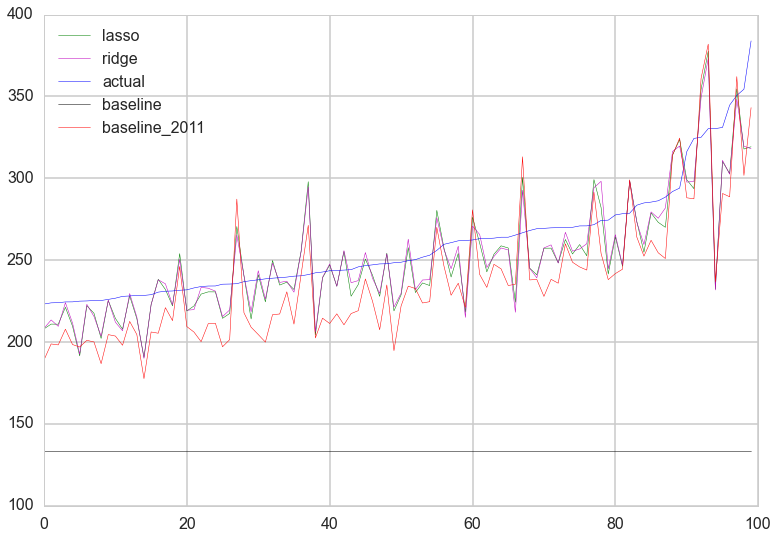

In [148]:
# plot to show difference between baseline, lasso, and ridge regressions
# HOUSE/RENTAL ratio 2015

ratio_2015_preds_df = pd.DataFrame({'baseline_2011':ratio_2015_test_best.ratio_2011, 'baseline':train_ratio_2015_mean,'lasso':lasso_pred_ratio_2015, 'ridge': ridge_pred_ratio_2015,'actual':ratio_2015_test_best.response})
ratio_2015_preds_df = ratio_2015_preds_df.sort('actual')

m=1870
n=1970

plt.plot(ratio_2015_preds_df.lasso[m:n], color='g', linewidth=0.5, label='lasso')
plt.plot(ratio_2015_preds_df.ridge[m:n], color='m', linewidth=0.5, label='ridge')
plt.plot(ratio_2015_preds_df.actual[m:n], color='b', linewidth=0.5, label='actual')
plt.plot(ratio_2015_preds_df.baseline[m:n], color='k', linewidth=0.5, label='baseline')
plt.plot(ratio_2015_preds_df.baseline_2011[m:n], color='r', linewidth=0.5, label='baseline_2011')
plt.legend(loc='best')
plt.show()

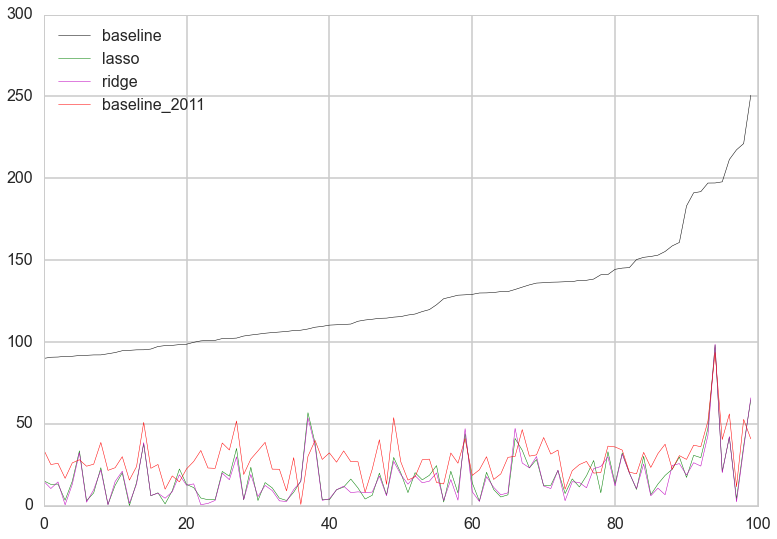

In [149]:
# plt.plot(ratio_2015_preds_df.actual[m:n], color='b', linewidth=0.5, label='actual')
plt.plot(abs(ratio_2015_preds_df.baseline[m:n] - ratio_2015_preds_df.actual[m:n]), color='k', linewidth=0.5, label='baseline')
plt.plot(abs(ratio_2015_preds_df.lasso[m:n] - ratio_2015_preds_df.actual[m:n]), color='g', linewidth=0.5, label='lasso')
plt.plot(abs(ratio_2015_preds_df.ridge[m:n] - ratio_2015_preds_df.actual[m:n]), color='m', linewidth=0.5, label='ridge')
plt.plot(abs(ratio_2015_preds_df.baseline_2011[m:n] - ratio_2015_preds_df.actual[m:n]), color='r', linewidth=0.5, label='baseline_2011')

plt.legend(loc='best')
plt.show()

#svm's

## Filter By State Plots

In [150]:
zip_resp_test_map = ratio_2015_test_best[['zipcode','response']]
zip_resp_test_map['zipcode'] = zip_resp_test_map['zipcode'].astype('int').astype('str')
state_resp_map = state_zip_map.merge(zip_resp_test_map, how='inner', on='zipcode')
state_resp_map = state_resp_map.rename(columns={'response':'actual'})

/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [151]:
state_resp_map.head(2)

,state,zipcode,actual
0,NY,10004,288.464640
1,NY,10010,324.337007


In [152]:
# don't run this multiple times - if you do, go up a couple cells and re-creat original 'ratio_2015_preds_df'
ratio_2015_preds_df = ratio_2015_preds_df.merge(state_resp_map, how='inner', on='actual')

In [166]:
ratio_2015_preds_df['state'] = [el.upper() for el in ratio_2015_preds_df['state']]
states = ratio_2015_preds_df['state'].drop_duplicates().values.tolist()
len(states)

41

In [167]:
ratio_2015_preds_df.head(3)

,actual,baseline,baseline_2011,lasso,ridge,state,zipcode
0,38.362361,133.223276,37.730442,41.229054,37.153264,MD,21205
1,47.400434,133.223276,69.109690,64.525217,64.135041,MO,64132
2,47.734003,133.223276,46.704331,51.059418,51.789100,MI,48234


In [175]:
np.array(states)

array(['MD', 'MO', 'MI', 'IL', 'NY', 'OH', 'PA', 'TN', 'GA', 'FL', 'AL',
       'KS', 'OK', 'IN', 'TX', 'KY', 'LA', 'NC', 'SC', 'AR', 'AZ', 'IA',
       'CA', 'NE', 'WA', 'WV', 'VA', 'MS', 'DE', 'MN', 'WI', 'NV', 'CO',
       'NM', 'AK', 'DC', 'ID', 'OR', 'UT', 'MT', 'HI'], 
      dtype='|S2')

1

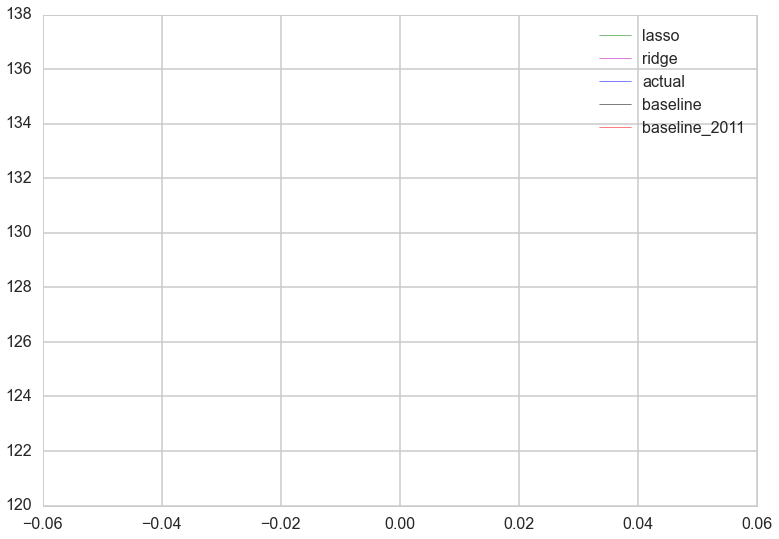

In [194]:
# plot to show difference between baseline, lasso, and ridge regressions
# HOUSE/RENTAL ratio 2015

state='AK'

plt.plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == state].lasso, color='g', linewidth=0.5, label='lasso')
plt.plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == state].ridge, color='m', linewidth=0.5, label='ridge')
plt.plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == state].actual, color='b', linewidth=0.5, label='actual')
plt.plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == state].baseline, color='k', linewidth=0.5, label='baseline')
plt.plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == state].baseline_2011, color='r', linewidth=0.5, label='baseline_2011')
plt.legend(loc='best')
plt.show()

In [201]:
ratio_2015_preds_df[(ratio_2015_preds_df['state'] == 'MD')].lasso.values

array([  41.22905408,   64.94939667,   75.83304128,   90.88614409,
         92.01174905,  100.7124711 ,   98.50560438,   94.75552453,
         87.30909267,  104.22070201,  113.04738054,   97.49942255,
        115.50766537,  150.63717193,  117.35202116,  119.33883543,
        125.83672279,  127.4299662 ,  116.54011072,  124.80071377,
        134.52242563,  123.54335391,  130.24279858,  130.10370115,
        139.17548305,  129.71169725,  141.30286251,  146.40572471,
        143.6374695 ,  151.55571484,  144.51203454,  154.9262657 ,
        142.36299198,  147.72061659,  132.99153471,  142.07093984,
        141.59614073,  150.22241914,  144.69821091,  150.41583117,
        145.82758097,  152.38564351,  151.24753232,  161.68953575,
        170.88419422,  160.23673941,  169.17465713,  169.36255586,
        176.27516168,  175.86238757,  159.00299971,  176.32752516,
        164.33993183,  161.714357  ,  168.11652954,  172.01825912,
        175.52833802,  189.44950124,  172.35499216,  197.22680

number of good states = 25


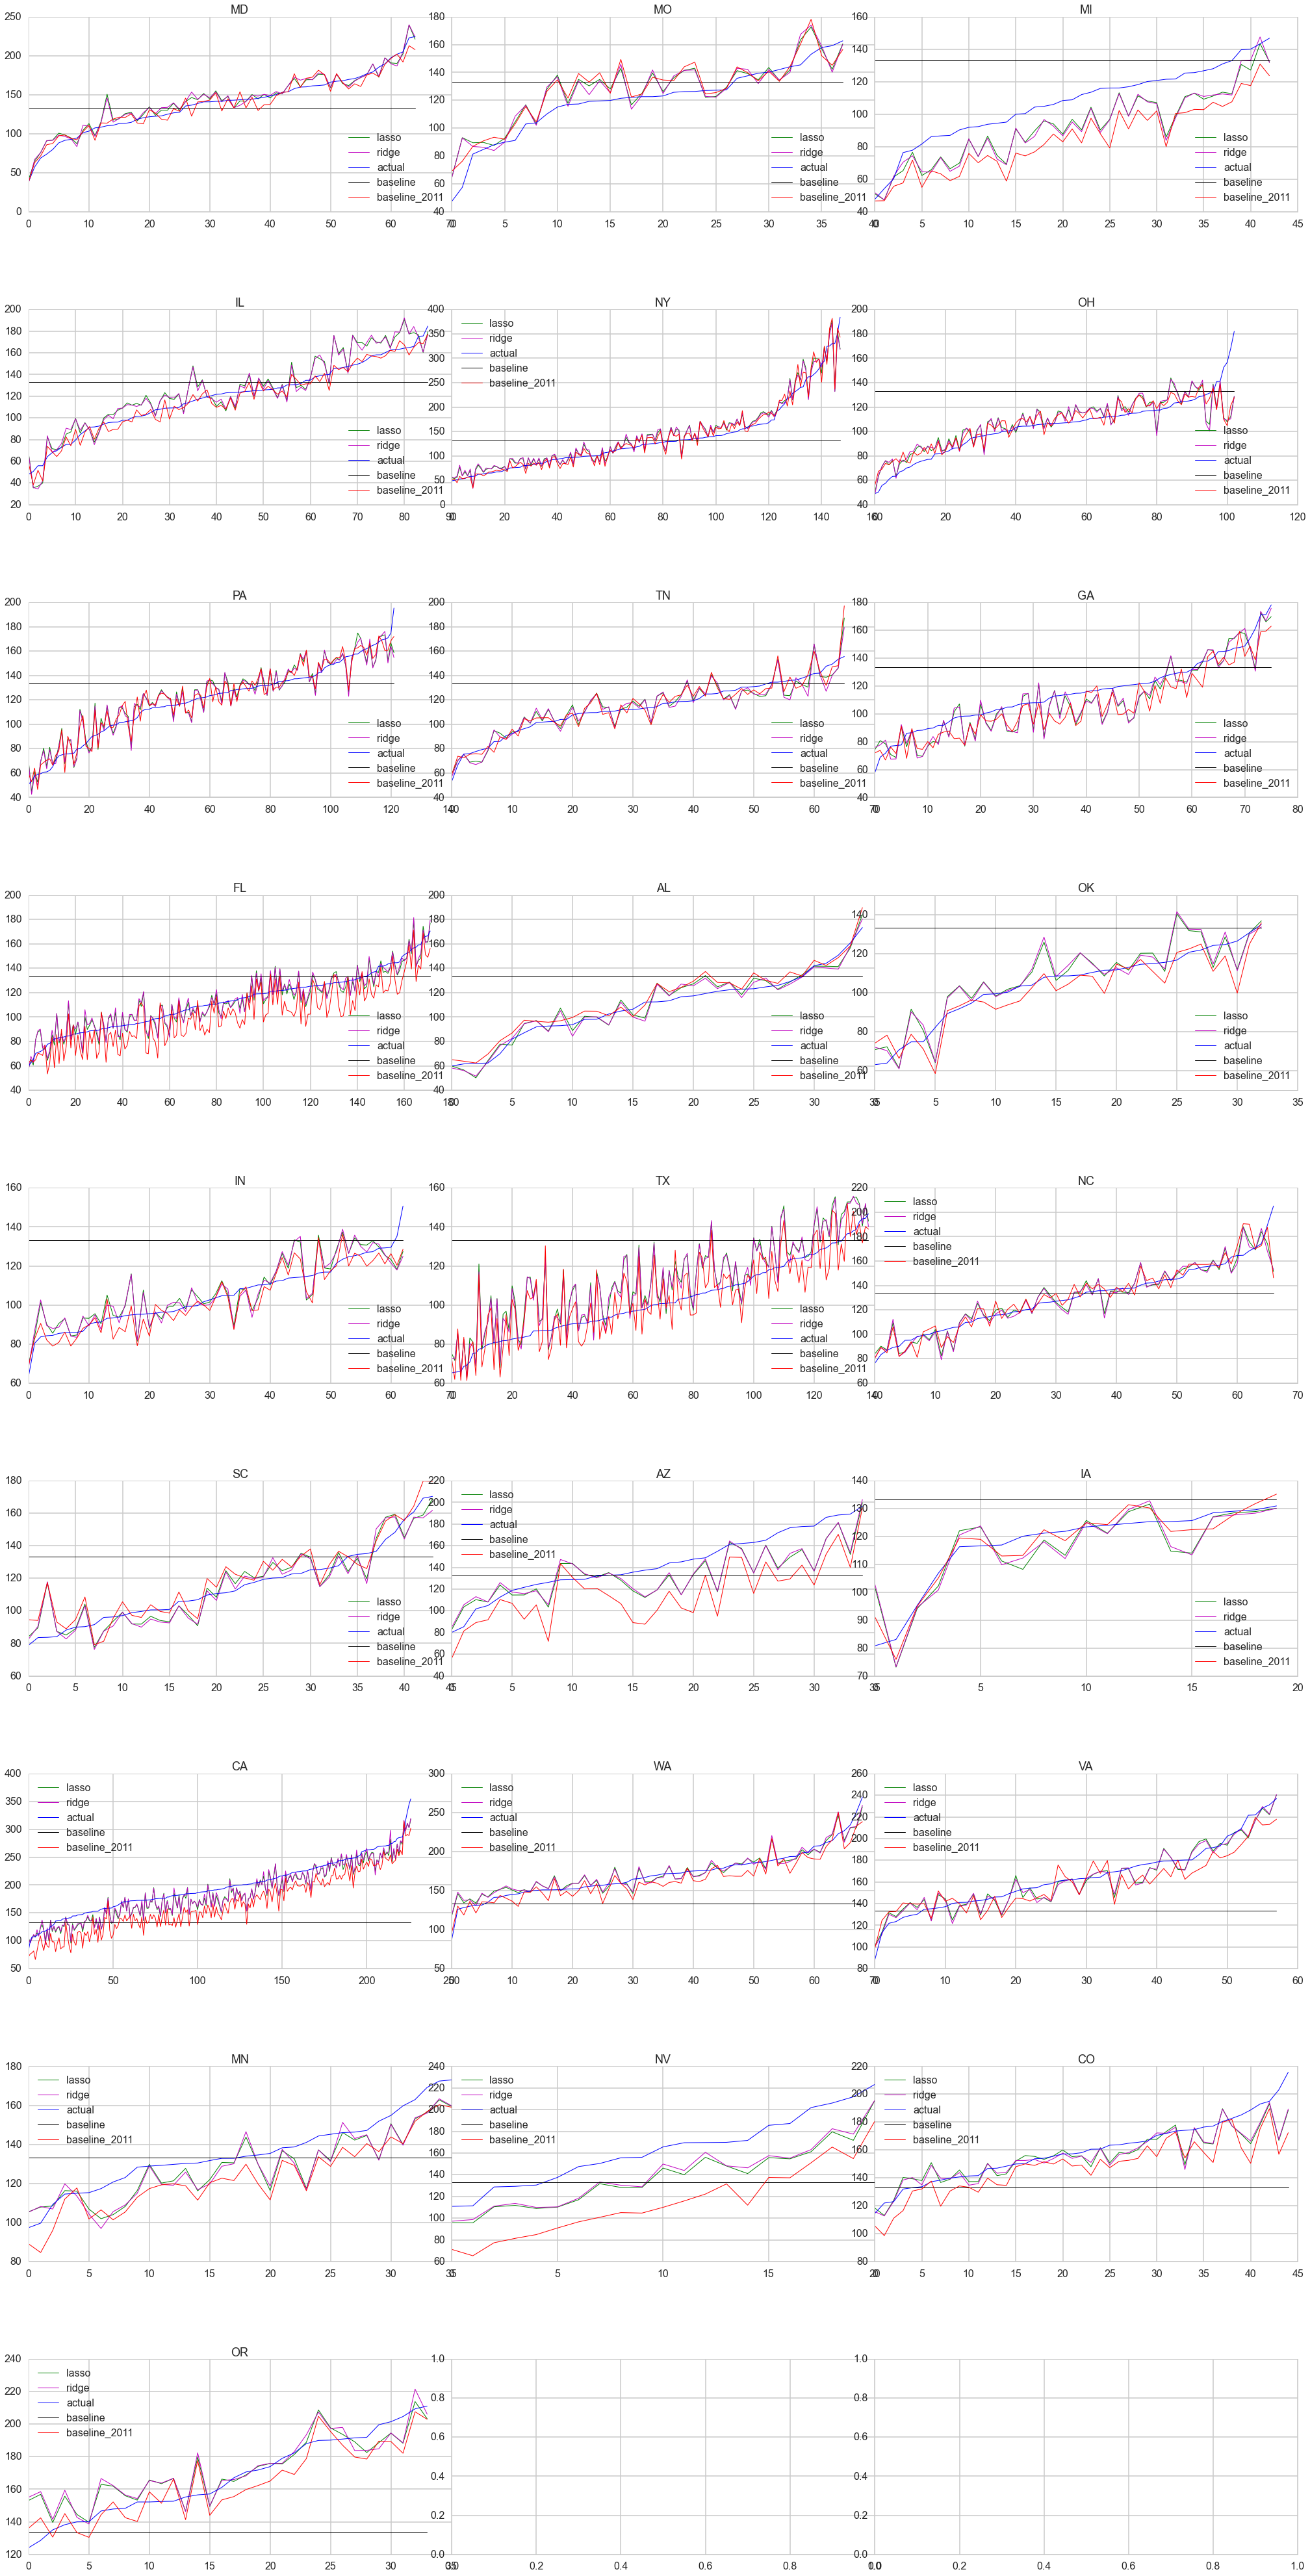

In [214]:
good_states = [s for s in states if (ratio_2015_preds_df[ratio_2015_preds_df['state']==s].shape[0] > 15)]
print 'number of good states = %s'%(len(good_states))

if len(good_states)%3 == 0 :
    nROW = len(good_states)/3
else :
    nROW = np.ceil(len(good_states)/3.).astype(int)
nCOL = 3

# f, ax = plt.subplots(nrows=nROW, ncols=nCOL, figsize=(35,70))
fig, axs = plt.subplots(nROW, nCOL, figsize=(35, 70), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in xrange(len(good_states)):
    
    axs[i].plot(ratio_2015_preds_df[(ratio_2015_preds_df['state'] == good_states[i])].lasso, color='g', linewidth=1, label='lasso')
    axs[i].plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == good_states[i]].ridge, color='m', linewidth=1, label='ridge')
    axs[i].plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == good_states[i]].actual, color='b', linewidth=1, label='actual')
    axs[i].plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == good_states[i]].baseline, color='k', linewidth=1, label='baseline')
    axs[i].plot(ratio_2015_preds_df[ratio_2015_preds_df['state'] == good_states[i]].baseline_2011, color='r', linewidth=1, label='baseline_2011')
    axs[i].legend(loc='best')
    axs[i].set_title(str(good_states[i]), fontsize=18)


In [ ]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

#your code here
from sklearn.grid_search import GridSearchCV
import time

start_time = time.time()

n_folds = 5
n_jobs = 4
gs = GridSearchCV(clfsvm, param_grid={"C": Cs}, cv=n_folds, n_jobs=n_jobs)
gs.fit(Xmatrix_train, Yresp_train)

C_best = gs.best_params_['C']
print 'The best c-value is %s'%(C_best)

print '----- %s seconds to run -----'%(time.time() - start_time)

In [ ]:
##### In case we want to do SVM regression/other types of models later

In [ ]:
#calculate the accuracy here
#your code here
start_time = time.time()

best = LinearSVC(C=C_best, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0)
best.fit(Xmatrix_train, Yresp_train)

training_accuracy = best.score(Xmatrix_train, Yresp_train)
test_accuracy = best.score(Xmatrix_test, Yresp_test)
print '#### based on the best LinearSVC ####'
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print '----- %s seconds to run -----'%(time.time() - start_time)